In [62]:
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [149]:
objectives = ["mml_zscore", "pg_zscore", "mml_basic", "pg_basic"]
policies = ["off_policy", "on_policy"]
sampling_algorithms = ["mixed", "top_p", "beam_search"]
seeds = ["12321", "11", "1993", "42", "2023"]

experiment_results: Dict[str, List[np.array]] = {}
experiment_steps: Dict[str, List[np.array]] = {}
for obj in objectives:
    for pol in policies:
        for sample_alg in sampling_algorithms:
            experiment_results[f"{obj}_{pol}_{sample_alg}"] = []
            experiment_steps[f"{obj}_{pol}_{sample_alg}"] = []
            for seed in seeds:
                path = "ablation-results-july-24"
                file = f"{path}/sst2_2_128_all_finetune_{seed}_0.00001_0_1_0_{obj}_{pol}_{sample_alg}_accuracy_0.6.csv"
                try:
                    df = pd.read_csv(file)
                    step_arr = df["Step"].tolist()
                    performance_arr = df["Value"].tolist()
                    experiment_steps[f"{obj}_{pol}_{sample_alg}"].append(np.array(step_arr[:200]))
                    experiment_results[f"{obj}_{pol}_{sample_alg}"].append(np.array(performance_arr[:200]))
                except Exception as e:
                    print("not found", e)
                    continue


def experiment_to_numpy(experiment_name: str) -> Tuple[np.array, np.array, np.array, np.array]:
    x = np.array(experiment_steps[experiment_name][0])
    y = np.array(experiment_results[experiment_name]) * 100.00
    print(experiment_name, x.shape, y.shape)
    mean_y = np.mean(y, axis=0)
    std_y = np.std(y, axis=0)
    return x, y, mean_y, std_y


experiment_means = {exp_name: experiment_to_numpy(exp_name)[2] for exp_name in experiment_results.keys()}
experiment_stds = {exp_name: experiment_to_numpy(exp_name)[3] for exp_name in experiment_results.keys()}
experiment_steps = {exp_name: experiment_to_numpy(exp_name)[0] for exp_name in experiment_results.keys()}

not found [Errno 2] No such file or directory: 'ablation-results-july-24/sst2_2_128_all_finetune_11_0.00001_0_1_0_mml_zscore_off_policy_top_p_accuracy_0.6.csv'
not found [Errno 2] No such file or directory: 'ablation-results-july-24/sst2_2_128_all_finetune_11_0.00001_0_1_0_mml_zscore_off_policy_beam_search_accuracy_0.6.csv'
not found [Errno 2] No such file or directory: 'ablation-results-july-24/sst2_2_128_all_finetune_2023_0.00001_0_1_0_mml_zscore_on_policy_top_p_accuracy_0.6.csv'
not found [Errno 2] No such file or directory: 'ablation-results-july-24/sst2_2_128_all_finetune_11_0.00001_0_1_0_mml_zscore_on_policy_beam_search_accuracy_0.6.csv'
not found [Errno 2] No such file or directory: 'ablation-results-july-24/sst2_2_128_all_finetune_42_0.00001_0_1_0_mml_zscore_on_policy_beam_search_accuracy_0.6.csv'
not found [Errno 2] No such file or directory: 'ablation-results-july-24/sst2_2_128_all_finetune_11_0.00001_0_1_0_pg_zscore_off_policy_top_p_accuracy_0.6.csv'
not found [Errno 2] No s

In [146]:
colors = {
    "mml_basic_off_policy_beam_search": "black",
    "mml_basic_off_policy_top_p": "blue",
    "mml_basic_off_policy_mixed": "green",
    "mml_zscore_off_policy_beam_search": "black",
    "mml_zscore_off_policy_top_p": "blue",
    "mml_zscore_off_policy_mixed": "green",
    "pg_basic_off_policy_beam_search": "orange",
    "pg_basic_off_policy_top_p": "brown",
    "pg_basic_off_policy_mixed": "red",
    "pg_zscore_off_policy_beam_search": "orange",
    "pg_zscore_off_policy_top_p": "brown",
    "pg_zscore_off_policy_mixed": "red",
    "pg_basic_on_policy_beam_search": "cyan",
    "pg_basic_on_policy_top_p": "slategray",
    "pg_basic_on_policy_mixed": "pink",
    "pg_zscore_on_policy_beam_search": "cyan",
    "pg_zscore_on_policy_top_p": "slategray",
    "pg_zscore_on_policy_mixed": "pink",
    "mml_basic_on_policy_beam_search": "goldenrod",
    "mml_basic_on_policy_top_p": "khaki",
    "mml_basic_on_policy_mixed": "orchid",
    "mml_zscore_on_policy_beam_search": "lime",
    "mml_zscore_on_policy_top_p": "navy",
    "mml_zscore_on_policy_mixed": "teal",
}

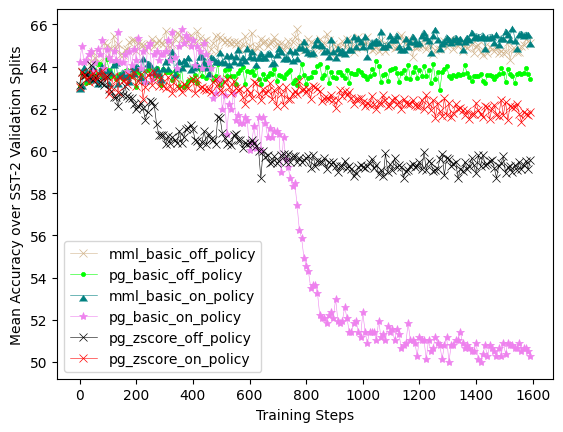

In [147]:
# comparison between off-policy vs on-policy across PG and ML gradient vectors.
# the diagrams are average across the three decoding techniques "top_p", "beam_search", "mixed".
fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy",
    "pg_basic_off_policy",
    "mml_basic_on_policy",
    "pg_basic_on_policy",
    # "mml_zscore_off_policy",
    "pg_zscore_off_policy",
    # "mml_zscore_on_policy",
    "pg_zscore_on_policy",
]
local_colors = ["tan", "lime", "teal", "violet", "black", "red", "blue", "green"]
linestyles = ["solid", "solid", "solid", "solid", "solid", "solid", "solid", "solid"]
markers = ["x", ".", 6, "*", "x", "x", "x", "x"]
for idx, exp in enumerate(experiments_to_see):
    means = (
        experiment_means[exp + "_top_p"] + experiment_means[exp + "_beam_search"] + experiment_means[exp + "_mixed"]
    ) / 3.0
    plt.plot(
        experiment_steps[exp + "_mixed"],
        means,
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.4,
        label=exp,
        linestyle=linestyles[idx],
        markeredgewidth=0.5,
    )


plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("on_policy_vs_off_policy.svg", format="svg", dpi=1200)

# off-policy is not diverging but on-policy is diverging!

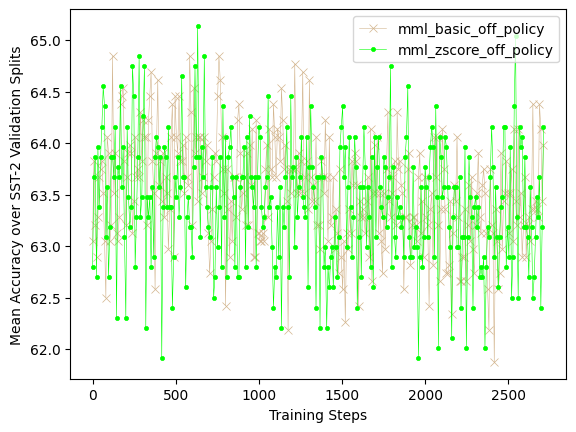

In [114]:
# comparison between off-policy vs on-policy across PG and ML gradient vectors.
# the diagrams are average across the three decoding techniques "top_p", "beam_search", "mixed".
fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy",
    "mml_zscore_off_policy",
    # "mml_basic_on_policy",
    # "pg_basic_on_policy",
    # "mml_zscore_on_policy",
]
local_colors = ["tan", "lime", "teal", "violet", "black", "red", "blue", "green"]
linestyles = ["solid", "solid", "solid", "solid", "solid", "solid", "solid", "solid"]
markers = ["x", ".", 6, "*", "x", "x", "x", "x"]
for idx, exp in enumerate(experiments_to_see):
    means = (
        experiment_means[exp + "_top_p"]  # + experiment_means[exp + "_beam_search"] + experiment_means[exp + "_mixed"]
    ) / 1.0
    plt.plot(
        experiment_steps[exp + "_mixed"],
        means,
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.4,
        label=exp,
        linestyle=linestyles[idx],
        markeredgewidth=0.5,
    )


plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("on_policy_vs_off_policy.svg", format="svg", dpi=1200)

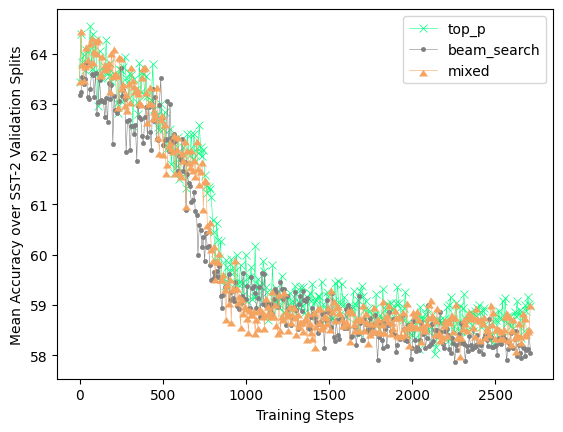

In [115]:
# comparison of the decoding techniques, which one is acheiving better results here!
# the development results are with top-p with default t = 1.
# this is the comparison for pg gradient vectors.
fig = plt.figure()

experiments_to_see = [
    "top_p",
    "beam_search",
    "mixed",
]

local_colors = ["springgreen", "gray", "sandybrown"]
linestyles = ["solid", "solid", "solid", "solid"]
markers = ["x", ".", 6, "*"]
for idx, exp in enumerate(experiments_to_see):
    avg_dims = ["pg_zscore_on_policy", "pg_zscore_off_policy", "pg_basic_on_policy", "pg_basic_off_policy"]
    means = 0.0
    for avg_dim in avg_dims:
        means += experiment_means[f"{avg_dim}_{exp}"]
    plt.plot(
        experiment_steps["pg_zscore_off_policy_beam_search"],
        means / 4.0,
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.4,
        label=exp,
        linestyle=linestyles[idx],
        markeredgewidth=0.5,
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("topp_vs_beam_mixed.svg", format="svg", dpi=1200)

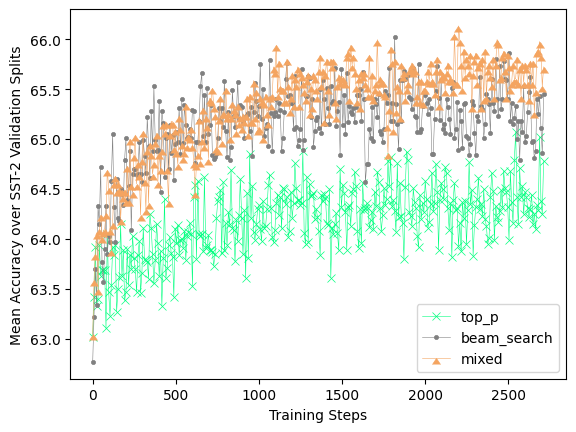

In [116]:
# comparison of the decoding techniques, which one is acheiving better results here!
# the development results are with top-p with default t = 1.
# this is the comparison for mml gradient vectors.
fig = plt.figure()

experiments_to_see = [
    "top_p",
    "beam_search",
    "mixed",
]

local_colors = ["springgreen", "gray", "sandybrown"]
linestyles = ["solid", "solid", "solid", "solid"]
markers = ["x", ".", 6, "*"]
for idx, exp in enumerate(experiments_to_see):
    avg_dims = ["mml_zscore_on_policy", "mml_zscore_off_policy", "mml_basic_on_policy", "mml_basic_off_policy"]
    means = 0.0
    for avg_dim in avg_dims:
        means += experiment_means[f"{avg_dim}_{exp}"]
    plt.plot(
        experiment_steps["mml_zscore_off_policy_beam_search"],
        means / 4.0,
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.4,
        label=exp,
        linestyle=linestyles[idx],
        markeredgewidth=0.5,
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("topp_vs_beam_mixed.svg", format="svg", dpi=1200)

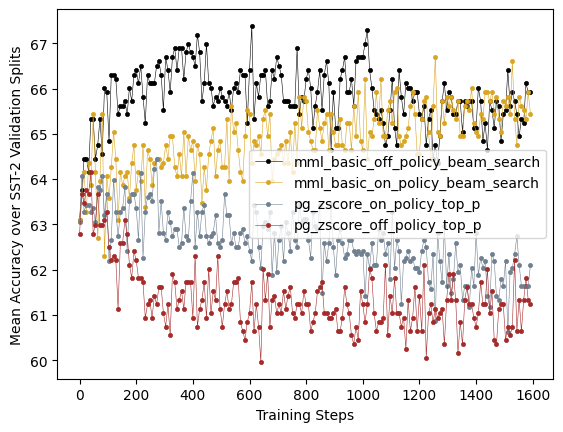

In [148]:
# is pg better than mml?

fig = plt.figure()

experiments_to_see = [
    # "mml_zscore_on_policy_beam_search",
    # "mml_zscore_off_policy_beam_search",
    "mml_basic_off_policy_beam_search",
    "mml_basic_on_policy_beam_search",
    # "mml_zscore_on_policy_top_p",
    # "mml_zscore_off_policy_top_p",
    # "mml_zscore_on_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "pg_basic_on_policy_beam_search",
    # "pg_basic_off_policy_beam_search",
    # "pg_basic_on_policy_top_p",
    # "pg_basic_off_policy_top_p",
    "pg_zscore_on_policy_top_p",
    "pg_zscore_off_policy_top_p",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_off_policy_mixed",
    # "mml_zscore_on_policy_mixed",
    # "mml_zscore_off_policy_mixed",
    # "pg_basic_on_policy_mixed",
    # "pg_basic_off_policy_mixed",
    # "pg_zscore_on_policy_top_p",
    # "pg_zscore_off_policy_top_p",
    # "pg_off_policy_beam_search",
    # "pg_off_policy_top_p",
    # "pg_off_policy_mixed",
]
markers = [".", ".", ".", ".", ".", ".", ".", "."]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=colors[exp],
        marker=markers[idx],
        linewidth=0.4,
        label=exp,
        markeredgewidth=0.5,
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("mml_vs_pg_off_policy.svg", format="svg", dpi=1200)

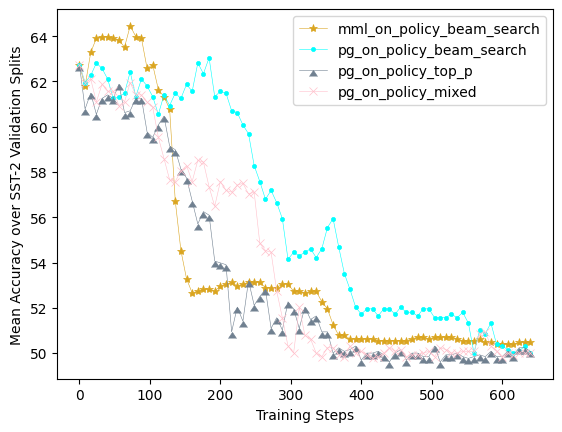

In [7]:
# is MML better than PG in the off-policy setting?
fig = plt.figure()

experiments_to_see = [
    "mml_on_policy_beam_search",
    "pg_on_policy_beam_search",
    "pg_on_policy_top_p",
    "pg_on_policy_mixed",
]
markers = ["*", ".", 6, "x"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=colors[exp],
        marker=markers[idx],
        linewidth=0.4,
        label=exp,
        markeredgewidth=0.5,
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("mml_vs_pg_on_policy.svg", format="svg", dpi=1200)

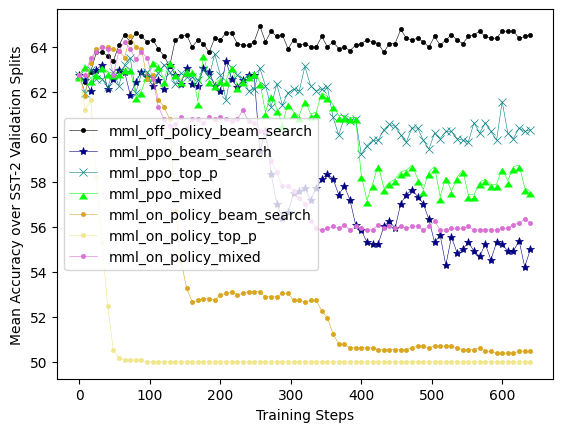

In [9]:
# only compare mml off policy beam search and mml on policy beam search with ppo!
fig = plt.figure()
experiments_to_see = [
    "mml_off_policy_beam_search",
    "mml_ppo_beam_search",
    "mml_ppo_top_p",
    "mml_ppo_mixed",
    "mml_on_policy_beam_search",
    "mml_on_policy_top_p",
    "mml_on_policy_mixed",
]
markers = [".", "*", "x", 6, ".", ".", "."]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=colors[exp],
        marker=markers[idx],
        linewidth=0.4,
        label=exp,
        markeredgewidth=0.5,
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("mml_vs_ppo.svg", format="svg", dpi=1200)

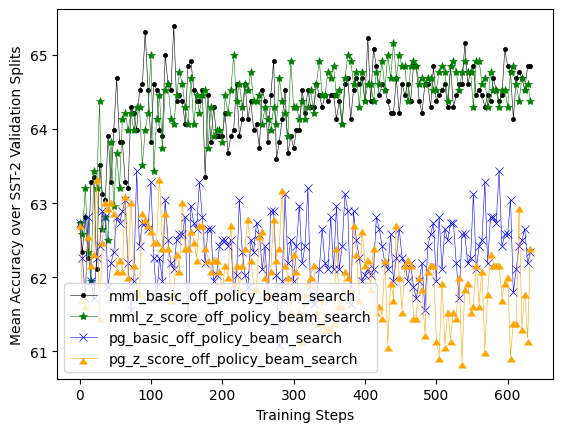

In [11]:
fig = plt.figure()
experiments_to_see = [
    "mml_basic_off_policy_beam_search",
    "mml_z_score_off_policy_beam_search",
    "pg_basic_off_policy_beam_search",
    "pg_z_score_off_policy_beam_search",
]
local_colors = ["black", "green", "blue", "orange"]
markers = [".", "*", "x", 6]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp][:159],
        experiment_means[exp][:159],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.4,
        label=exp,
        markeredgewidth=0.5,
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("zscore_off_policy.svg", format="svg", dpi=1200)

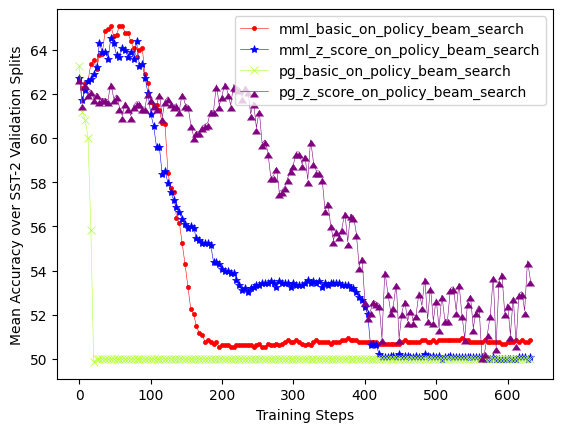

In [12]:
fig = plt.figure()

experiments_to_see = [
    "mml_basic_on_policy_beam_search",
    "mml_z_score_on_policy_beam_search",
    "pg_basic_on_policy_beam_search",
    "pg_z_score_on_policy_beam_search",
]
local_colors = ["red", "blue", "greenyellow", "purple", "black", "brown", "orange", "green"]
markers = [".", "*", "x", 6]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp][:159],
        experiment_means[exp][:159],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.4,
        label=exp,
        markeredgewidth=0.5,
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("zscore_on_policy.svg", format="svg", dpi=1200)